<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools</div>
<div style="text-align: right">Ameya Apte (NUID 002764540), Aditya Sawant (NUID 002762104), Nainil Maladkar (NUID 002780019)</div>

# FINAL PROJECT

Lets retrive the book which we have saved for our analysis. We will use **Playing It My Way** by **Boria Majumdar and Sachin Tendulkar**. This book talks about **the life of Sachin Tendulkar** and summarises his early days, his 24 years of international career and different aspects of his personal life.

<br>

<center>
<img src="Testing Project/title.jpeg" width=200 />
</center>

# Text Rank

<br>

<center>
<img src="Testing Project/textrank.jpeg" width=400 />
</center>

- Textrank is a graph-based ranking algorithm like Google’s PageRank algorithm. 

- It is used for text processing which can be used in order to find the most relevant sentences in text and also to find keywords.

- For finding the most relevant sentences in the text, a graph is constructed where the vertices of the graph represent each sentence in a document and the edges between sentences are based on content overlap, namely by calculating the number of words that 2 sentences have in common.

- Based on this network of sentences, the sentences are fed into the Pagerank algorithm which identifies the most important sentences. When we want to extract a summary of the text, we can now take only the most important sentences.

Below are the required libraries that are imported -- 

In [1]:
from sentence_transformers import SentenceTransformer
import numpy as np
import os
from tqdm import tqdm
import networkx
import matplotlib.pyplot as plt

Using **all-MiniLM-L6-v2** sentence-transformers model which maps sentences & paragraphs to a 384 dimensional dense vector space and can be used for tasks like clustering or semantic search.

In [2]:
bmodel = SentenceTransformer('all-MiniLM-L6-v2')

Extracting paragraphs from the book under consideration

<br>

<center>
<img src="Testing Project/para.jpeg" width=400 />
</center>

In [3]:
final_paragraphs = []
for root, dirs, files in os.walk("Testing Project/"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r",encoding='utf-8') as input:
                paragraphs = input.read().split("\n\n")   #\n\n -- to remove blank line in between paragraphs.
            final_paragraphs.extend(paragraphs)
            
print(len(final_paragraphs))
print(final_paragraphs[0])

Testing Project/Playing It My Way by Sachin Tendulkar (1).txt
3245
First published in Great Britain in 2014 by Hodder & Stoughton An Hachet e UK company


Extracting sentences from the book under consideration

In [4]:
final_sentences = []
for root, dirs, files in os.walk("Testing Project/"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r",encoding='utf-8') as input:
                sentences = input.read().split(". ")   #. denotes end of sentence
            final_sentences.extend(sentences)
            
print(len(final_sentences))
print(final_sentences[0])

Testing Project/Playing It My Way by Sachin Tendulkar (1).txt
5826
First published in Great Britain in 2014 by Hodder & Stoughton An Hachet e UK company

Copyright © Sachin Tendulkar 2014

The right of Sachin Tendulkar to be identified as the Author of the Work has been asserted by him in accordance with the Copyright, Designs and Patents Act 1988.

All rights reserved


***

<br>

<center>
<img src="Testing Project/bert.jpeg" width=400 />
</center>
</br>


- If we search for a query: Best restaurant in Boston, we would like to get search results corresponding to restaurants in Boston and best. However, if we search saying: Top restaurant in Boston, our simple method would fail to detect the similarity between ‘Best’ and ‘Top’. This issue gave rise to what we now call word embeddings. Basically, a word embedding not only converts the word but also identifies the semantics and syntaxes of the word to build a vector representation of this information.

- Moreover, instead of dealing with individual words, we could work directly with individual sentences. Thus, we use Sentence Embedding techniques which represent entire sentences and their semantic information as vectors. This helps the machine in understanding the context, intention, and other nuances in the entire text.

- We will use BERT (Bidirectional Encoder Representations from Transformers) to extract features, namely word and sentence embedding vectors, from text data.

In [5]:
bert_embeddings = bmodel.encode(final_sentences)
bert_embeddings.shape

(5826, 384)

**Print the embeddings**

In [6]:
for i, (sentence, embedding) in enumerate(zip(final_sentences, bert_embeddings)):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    if i == 3: break

Sentence: First published in Great Britain in 2014 by Hodder & Stoughton An Hachet e UK company

Copyright © Sachin Tendulkar 2014

The right of Sachin Tendulkar to be identified as the Author of the Work has been asserted by him in accordance with the Copyright, Designs and Patents Act 1988.

All rights reserved
Embedding: [-2.41626371e-02  8.88295993e-02 -7.63081312e-02 -3.90852019e-02
 -2.83728223e-02  2.46795919e-03 -4.37880121e-02  8.40484649e-02
  4.97134477e-02  2.69950461e-02  4.88284323e-03  4.68258485e-02
  4.77373078e-02  1.51722860e-02 -3.00196391e-02  3.00767343e-03
 -3.91754285e-02  5.51237799e-02  1.02165982e-01 -5.68345785e-02
  2.05942076e-02  7.05784857e-02  9.43941530e-03 -3.99419926e-02
 -4.14268523e-02 -1.06571056e-01  2.50347331e-02  1.96525995e-02
 -7.06713498e-02 -6.34048879e-02 -3.69194746e-02 -7.23052258e-03
 -5.02065122e-02 -4.26244959e-02 -4.06440906e-02  4.39910889e-02
 -8.97258669e-02 -4.60110692e-04  8.50230977e-02 -2.48651416e-03
  2.98503377e-02 -1.1778

**Creating similarity matrix 'M' using cosine similarity**

In [7]:
M = np.eye(5826)

for i,a in tqdm(enumerate(bert_embeddings)):
    for j,b in enumerate(bert_embeddings):
        if i != j:
            M[i,j] = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b)) # formula for finding cosine similarity

5826it [27:45,  3.50it/s] 


In [8]:
M.shape

(5826, 5826)

**Taking out only 1000x1000 matrix from the M matrix**

In [9]:
M_slice1 = M[:1000,:1000]
M_slice1.shape

(1000, 1000)

**Taking out only 500x500 matrix from the M matrix**

In [10]:
M_slice2 = M[:500,:500]

**Taking out only 25x25 matrix from the M matrix**

In [11]:
M_slice3 = M[:25,:25]

**Computing similarity graphs for 25x25, 500x500, 1000x1000 and 5826x5826 matrix**

In [12]:
similarity_graph3 = networkx.from_numpy_array(M_slice3)
similarity_graph3

In [13]:
similarity_graph2 = networkx.from_numpy_array(M_slice2)
similarity_graph2

In [14]:
similarity_graph1 = networkx.from_numpy_array(M_slice1)
similarity_graph1

In [15]:
similarity_graph = networkx.from_numpy_array(M)
similarity_graph

**Plotting below the respective similarity graphs**

<br>

<center>
<img src="Testing Project/networkx.jpeg" width=400 />
</center>
</br>

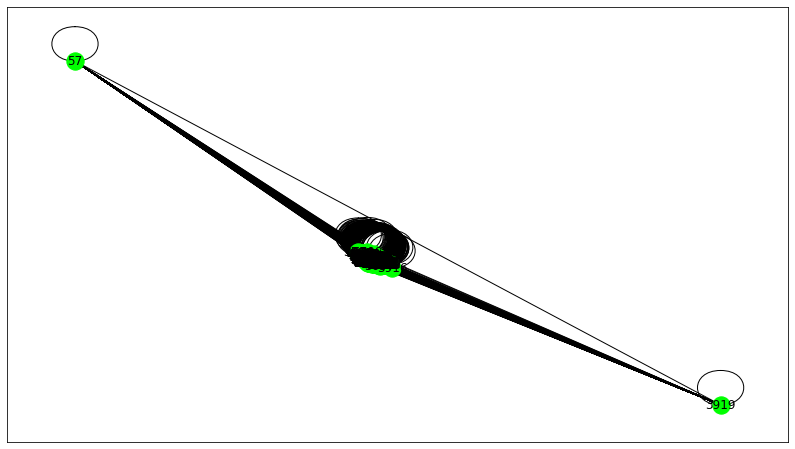

In [16]:
%matplotlib inline

plt.figure(figsize=(14, 8))
networkx.draw_networkx(similarity_graph, node_color='lime')

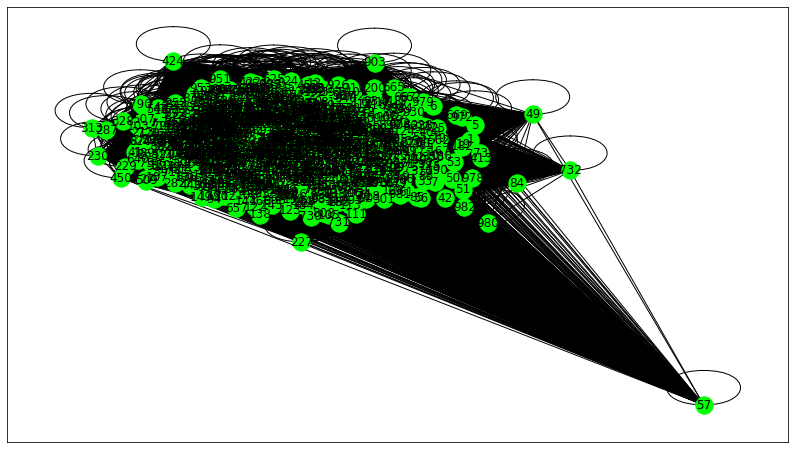

In [17]:
%matplotlib inline

plt.figure(figsize=(14, 8))
networkx.draw_networkx(similarity_graph1, node_color='lime')

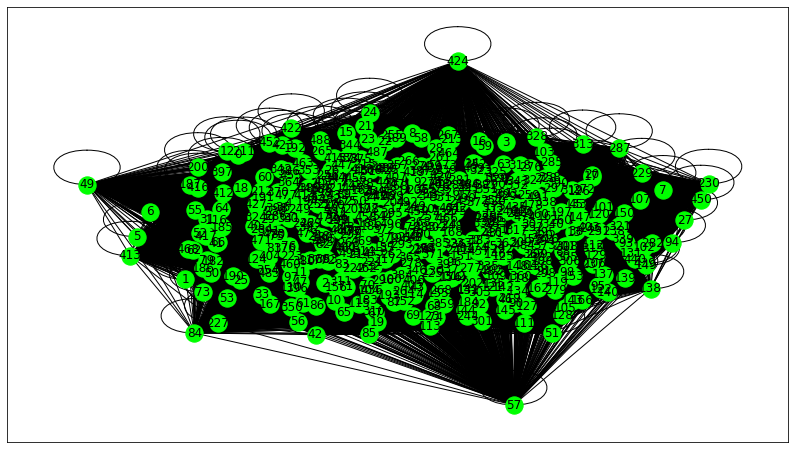

In [18]:
%matplotlib inline

plt.figure(figsize=(14, 8))
networkx.draw_networkx(similarity_graph2, node_color='lime')

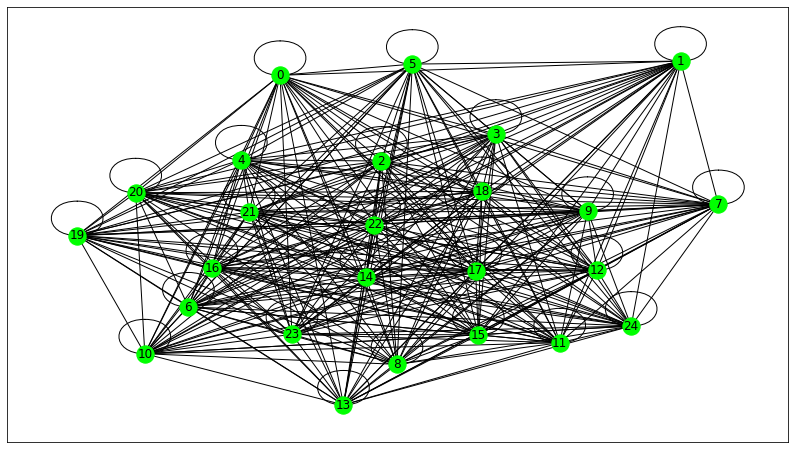

In [19]:
%matplotlib inline

plt.figure(figsize=(14, 8))
networkx.draw_networkx(similarity_graph3, node_color='lime')

**Determining the sentence rankings based on the similarity graph for 5826x5826 matrix obtained above**

The below senetences can be further used to generate textual summary of the book under consideration.

In [20]:
scores = networkx.pagerank(similarity_graph)
nx_ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
nx_ranked_sentences[:10]

[(0.00027356862810934787, 5474),
 (0.00027115444172004104, 2903),
 (0.000270564136424081, 395),
 (0.0002685869172975069, 3399),
 (0.00026813165039056027, 921),
 (0.0002672012850773492, 3679),
 (0.00026706808915412877, 810),
 (0.0002665522652717625, 618),
 (0.0002661143490442832, 5145),
 (0.00026485653427002227, 4690)]

In [21]:
for i in range(10):
    print(final_sentences[nx_ranked_sentences[i][1]])
    print('----------')

All that was needed to top it off was to perform well with the bat to leave my final mark on the sport I love so much.

We bowled brilliantly to get the West Indies out for 182 on the stroke of tea, at 2 p.m., with Pragyan Ojha taking five wickets and Ashwin three
----------
We were bowled out for 99, with no one managing to get in.

I was sit ing next to John Wright when Harbhajan was going out to bat, with India six wickets down
----------
It was a very significant innings in the context of my career, for shortly afterwards I was included in the list of Probables for the Mumbai Ranji Trophy team.

In my early days as a cricketer another person who helped me considerably was Hemant Waingankar
----------
My contribution was a disappointing total of ten runs.

In the final Test at the Wankhede Stadium the following week, Rahul and I were at the crease in the second innings when all of a sudden I felt a searing pain in my elbow again
----------
We were all stunned and amused at the same 

## Summary of the book 

<br>

<center>
<img src="Testing Project/interview.jpeg" width=400 />
</center>
</br>

Lets extract the summary of the book. Its how Sachin will introduce himself given that he is in an interview and someone asks him **Tell me about yourself?**

In [22]:
summary_text = []
for i in range(10):
#     print(final_sentences[nx_ranked_sentences[i][1]])
#     print('----------')
    summary_text.append(final_sentences[nx_ranked_sentences[i][1]])
text = '. '.join(summary_text)

In [23]:
text.replace('\n\n', ' ')

'All that was needed to top it off was to perform well with the bat to leave my final mark on the sport I love so much. We bowled brilliantly to get the West Indies out for 182 on the stroke of tea, at 2 p.m., with Pragyan Ojha taking five wickets and Ashwin three. We were bowled out for 99, with no one managing to get in. I was sit ing next to John Wright when Harbhajan was going out to bat, with India six wickets down. It was a very significant innings in the context of my career, for shortly afterwards I was included in the list of Probables for the Mumbai Ranji Trophy team. In my early days as a cricketer another person who helped me considerably was Hemant Waingankar. My contribution was a disappointing total of ten runs. In the final Test at the Wankhede Stadium the following week, Rahul and I were at the crease in the second innings when all of a sudden I felt a searing pain in my elbow again. We were all stunned and amused at the same time and this tiff between Kiran and Javed 

# Clustering

<br>

<center>
<img src="Testing Project/clustering.jpeg" width=400 />
</center>
</br>

Clustering is an unsupervised machine learning technique that divides the population or data points into several groups or clusters such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups.
Clustering is best if it has maximum inter cluster distance and minimum intra cluster distance.


## K Medoids 

<br>

<center>
<img src="Testing Project/kmedoids.jpeg" width=400 />
</center>
</br>

K-Medoids (also called Partitioning Around Medoid) is a clustering algorithm under unsupervised machine learning. 
A medoid can be defined as a point in the cluster, whose dissimilarities with all the other points in the cluster are minimum.

Mean of the data points is gets highly affected by the extremities, thus the final centroid of a 
K-Means cluster is not the actual point, but the average of the points that make up the cluster. 
Using K-Medoids clustering, the resulting centroids are transformed into real data points. A medoid in the K-Medoids algorithm is the most central element of the cluster, such that its distance from other points is minimum. Since medoids do not get influenced by extremities, the K-Medoids algorithm is more robust to outliers and noise than K-Means algorithm.

The best value of K can be computed using Silhouette method. Each data point gets assigned recusively to the cluster to which its nearest medoid belongs.
The cost function of K-Medoids techniques is to minimize intercluster distance and maximize intracluster distance. This can be achieved by minimizing the loss function:
 
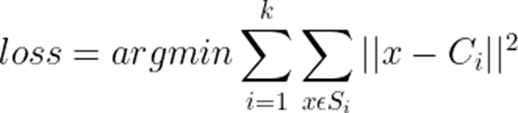
For each data point of cluster i, its distance from all other data points is computed and added. The point of ith cluster for which the computed sum of distances from other points is minimal is assigned as the medoid for that cluster.  And this is repeated until convergence.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

**from sklearn.decomposition import PCA**

Principal component analysis is a dimensionality-reduction method that is used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. Reducing the number of variables of a data set comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

**from sklearn.preprocessing import scale**

We also import a module for standardizing the dataset along an axis i.e. rescaling the data such that its has mean of 0 and componenet wise scale to unit variance.

**from sklearn.datasets import load_digits**

Makes use of digit dataset to set background colour based on pixel selection

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [26]:
digits.data.shape

(1797, 64)

In [27]:
num_digits = len(np.unique(digits.target))
num_digits

10

In [28]:
np.std(bert_embeddings[0])

0.05102663

<br>

<center>
<img src="Testing Project/pca.jpeg" width=400 />
</center>
</br>

Standardizing the data with PCA and Embedding

In [29]:
bert_embeddings_std = scale(bert_embeddings)
bert_embeddings_red = PCA(n_components=2).fit_transform(bert_embeddings_std)

C:\Users\naini\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\naini\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Plot the decision boundaries for each cluster. Assign a different color to each for differentiation.

In [30]:
h = 0.02 #step size of the mesh 
#Minimum and maximum x-coordinates
xmin, xmax = bert_embeddings_red[:, 0].min() - 1, bert_embeddings_red[:, 0].max() + 1
#Minimum and maximum y-coordinates
ymin, ymax = bert_embeddings_red[:, 1].min() - 1, bert_embeddings_red[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))

Define an array of K-Medoids variants to be used. 

We have used three different distance metrics for computing the distance of each data point from other data point while selecting the medoid.

We use Manhattan distance, if we need to calculate the distance between two data points in a grid-like path. Manhattan distance is usually preferred over the more common Euclidean distance as the dimension of the data increases.

Euclidean distance is the straight-line distance between 2 data points in a plane.

Cosine distance & Cosine Similarity metric is mainly used to find similarities between two data points. As the cosine distance between the data points increases, the cosine similarity, or the amount of similarity decreases, and vice versa.

The parameters specified in the KMedoids() method have the following significance:
•	metric – distance metric to be used (default: ‘euclidean’)
•	n_clusters – number of clusters to be formed and hence the number of medoids (one per cluster) (default value: 8)
•	init – ‘heuristic’ method used for medoid initialization. For each data point, itd distance from all other points is computed and the distances are summed up. N_clusters number of points for which such a sum of distances are minimum, are chosen as medoids.
•	max_iter – maximum number of the algorithm’s iterations to be performed when fitting the data


In [31]:
models = [
     (
         KMedoids(metric="manhattan", n_clusters=num_digits, 
         init="heuristic", max_iter=2),"Manhattan metric",
     ),
     (
         KMedoids(metric="euclidean", n_clusters=num_digits,  
         init="heuristic", max_iter=2),"Euclidean metric",
     ),
     (KMedoids(metric="cosine", n_clusters=num_digits, init="heuristic", 
      max_iter=2), "Cosine metric", ),
 ]
models

[(KMedoids(max_iter=2, metric='manhattan', n_clusters=10), 'Manhattan metric'),
 (KMedoids(max_iter=2, n_clusters=10), 'Euclidean metric'),
 (KMedoids(max_iter=2, metric='cosine', n_clusters=10), 'Cosine metric')]

Initialize the number of rows and columns of the plot for plotting subplots of each of the three metrics’ results.

In [32]:
#number of rows = integer(ceiling(number of model variants/2))
num_rows =int(np.ceil(len(models) / 2.0))
#number of columns
num_cols = 2 

Fit each of the model variants to the data and plot the resultant clustering

In [33]:
#Clear the current figure first (if any)
plt.clf()

#Initialize dimensions of the plot
plt.figure(figsize=(1000,1000))
# f = plt.figure()
# f.set_figwidth(4)
# f.set_figheight(1)

<Figure size 72000x72000 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 72000x72000 with 0 Axes>

The `models` array contains three tuples, each having a model variant’s parameters and its descriptive text. We iterate through each of the tuples, fit the data to the model and plot the results.

C:\Users\naini\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:243: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\naini\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 9 is empty! self.labels_[self.medoid_indices_[9]] may not be labeled with its corresponding cluster (9).
  warnings.warn(
C:\Users\naini\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:243: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\naini\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  warnings.warn(
C:\Users\naini\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:243: Convergenc

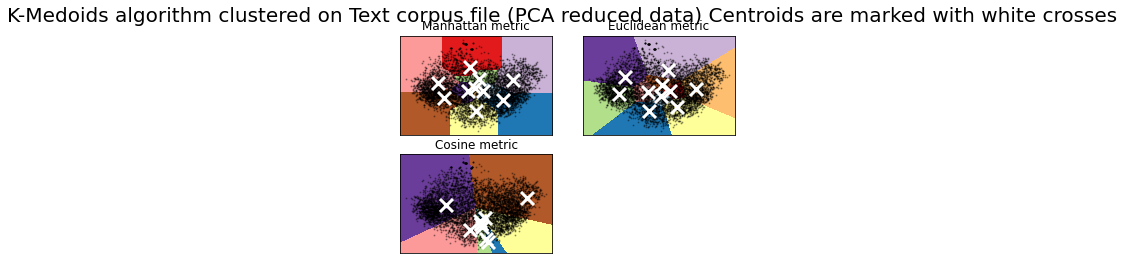

In [34]:
for i, (model, description) in enumerate(models):
    # Fit each point in the mesh to the model
    model.fit(bert_embeddings_red)
    
    #Predict the labels for points in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result  into a color plot
    Z = Z.reshape(xx.shape)
   
    #Subplot for the ith model variant
    plt.subplot(num_cols, num_rows, i + 1)
   
    #Display the subplot
    plt.imshow(
         Z,    #data to be plotted
         interpolation="nearest",
        #bounding box coordinates (left,right,bottom,top)
         extent=(xx.min(), xx.max(), yy.min(), yy.max()),
         cmap=plt.cm.Paired,  #colormap
         aspect="auto", #aspect ratio of the axes
         origin="lower",  #set origin as lower left corner of the axes
    )
    plt.plot(
         bert_embeddings_red[:, 0], bert_embeddings_red[:, 1], "k.", markersize=2, alpha=0.3
    )
        
    # Plot the centroids as white cross marks
    centroids = model.cluster_centers_
    plt.scatter(
         centroids[:, 0],
         centroids[:, 1],
         marker="x",
         s=169,  #marker’s size (points^2)
         linewidths=3, #width of boundary lines
         color="w",  #white color for centroids markings
         zorder=10,  #drawing order of axes
    )
    
    #describing text of the tuple will be title of the subplot
    plt.title(description)  
    plt.xlim(xmin, xmax)  #limits of x-coordinates
    plt.ylim(ymin, ymax)  #limits of y-coordinates
    plt.xticks(())   
    plt.yticks(())
    
#Upper title of the whole plot
plt.suptitle(
    #Text to be displayed
    "K-Medoids algorithm clustered on Text corpus file (PCA reduced data) Centroids are marked with white crosses\n\n",
    fontsize=20,  #size of the fonts
)
plt.show()

In [35]:
centroids

array([[ 1.1437747 , -4.8129287 ],
       [ 0.7681876 , -3.2036157 ],
       [ 1.8109283 , -7.7731996 ],
       [-0.93727016, -5.4846125 ],
       [ 0.9411093 , -3.9510612 ],
       [ 2.0269842 , -8.508714  ],
       [ 0.97492296, -4.1515374 ],
       [-4.735165  ,  0.7294973 ],
       [ 1.661749  , -2.4043188 ],
       [ 8.420728  ,  2.614618  ]], dtype=float32)

Without dimensionality reduction:

In [36]:
centroids = []
for i, (model, description) in enumerate(models):
    model.fit(bert_embeddings_std)
    centroids.append(model.cluster_centers_)

Identify the centroid:

In [37]:
centroid_indeces = []

for i in range(10):
    c = centroids[2][i]
    for j in range(bert_embeddings_std.shape[0]):
        if np.allclose(c, bert_embeddings_std[j]):
            centroid_indeces.append(j)
            break

In [38]:
centroid_indeces

[5634, 5158, 699, 5371, 3853, 2966, 3832, 3173, 861, 4421]

In [39]:
for i in centroid_indeces:
    print(i, ' -------')
    print(final_sentences[i])
    print('---------')

5634  -------
It was certainly the biggest honour of my life and coming on the day I had bid my final goodbye to cricket made it all the more special
---------
5158  -------
Australia had managed a disappointing 237 in their first innings and the second-wicket partnership of 370 between Vijay and Pujara meant our bowlers had enough runs on the board to bowl the Australians out in the second innings without us having to bat twice.

I got out to James Pat inson for seven, get ing the faintest edge down the leg side
---------
699  -------
In his next over, I again hit a boundary off the first ball
---------
5371  -------
I called the police and informed them I had to leave for the hotel as soon as possible
---------
3853  -------
It was a game we had to win to qualify for the three-match final against Australia.

Sri Lanka scored 179, with Ishant Sharma and Praveen Kumar both taking four wickets, and when our innings started I managed to connect well from the off and went on to make 63 as

Now, again lets import all the required libraires. We need a lot of libraries!

In [100]:
import os
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import spacy

from collections import Counter, defaultdict

# import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import hist
from cycler import cycler

import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

from sklearn.datasets import load_digits

from sentence_transformers import SentenceTransformer

# Bayesian

<br>

<center>
<img src="Testing Project/bayesian.jpeg" width=400 />
</center>
</br>

Now first to start with our analysis, lets import a text file of the book.

We will open the file using utf-8 encoding since it was giving us some errors without it and we will extract all the paragraphs in the book into `book_paragraphs`. 

Individual paragraphs can be separated on the basis of separation between them. Two paragraphs are always separated by a blank line between them and so we will use the delimiter `\n\n` to separate paragraphs before storing them in `book_paragraphs`. We then print how many paragraphs we have retrieved from the book and also remove any paragraphs that might be shorter than 10 words. We do so to avoid taking into consideration any chapter headers or page numbers from our analysis

In [103]:
import os
book_paragraphs = []
for root, dirs, files in os.walk("Testing Project/"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r",encoding='utf-8') as input:
                paragraphs = input.read().split("\n\n")   #\n\n denotes there is a blank line in between paragraphs.
            book_paragraphs.extend(paragraphs)
            
print(len(book_paragraphs))
print(book_paragraphs[0])

for para in book_paragraphs:
    para_split = para.split(" ")
    if len(para_split) <= 10:
        book_paragraphs.remove(para)

Testing Project/Playing It My Way by Sachin Tendulkar (1).txt
3245
First published in Great Britain in 2014 by Hodder & Stoughton An Hachet e UK company


As we can see above, we have 3245 paragraphs! Those are truly a lot of paragraphs, but might also have one liner paragraphs as well! 

Now in a similar way, lets extract all the sentences in the book to `book_sentences`. Sentences are always separated from each other by a full stop, hence we will use the delimiter `.` to separate all the sentences. Lets do it and check how many sentences do we have!

In [104]:
#loading the dataset from the book
#book_sentences is mao_sentences

book_sentences = []    
for root, dirs, files in os.walk("Testing Project/"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r",encoding='utf-8') as input:
                sentences = input.read().split(". ")   #. denotes end of sentence
            book_sentences.extend(sentences)
            
print(len(book_sentences))
print(book_sentences[0])

Testing Project/Playing It My Way by Sachin Tendulkar (1).txt
5826
First published in Great Britain in 2014 by Hodder & Stoughton An Hachet e UK company

Copyright © Sachin Tendulkar 2014

The right of Sachin Tendulkar to be identified as the Author of the Work has been asserted by him in accordance with the Copyright, Designs and Patents Act 1988.

All rights reserved


So we have 5826 sentences in total. But do all of them really have any data present in them?

Remember the time when we extracted paragraphs, we used the delimiter `\n\n`. These delimiters would still be present in our sentences. Also if we now split the sentences on the basis of this delimiter `\n\n` we can possibly create `' '` or `''` blank spaces in our list of sentences. So we now need to clean the sentences for all the above things.

So lets start with the cleaning part. First lets use the delimiter `\n\n` and remove all the paragraph spaces and then remove all the blank spaces from our list of sentences. We will store this new list of sentences in `new_sentences`

In [105]:
new_sentences = []
for sentence in book_sentences:
    temp_sentence = sentence.split("\n\n")
    new_sentences.extend(temp_sentence)
    
for sentence in new_sentences:
    if sentence == '':
        new_sentences.remove(sentence)
        
for sentence in new_sentences:
    if sentence== ' ':
        new_sentences.remove(sentence)

Now that we have the new list of sentences in `new_sentences` lets just initialize our old list `book_sentences` with this new list again

In [106]:
book_sentences = new_sentences

<br>

<center>
<img src="Testing Project/dataframe.jpeg" width=400 />
</center>
</br>

Now lets make a pandas dataframe and store our cleaned list of sentences in the dataframe. We will call this dataframe as `book_df` and lets name our column as `Sentence` to denote we are storing sentences in this column. Lets check the top and botton 5 entries in this dataframe using `head()` and `tail()`

In [107]:
import pandas as pd
book_df = pd.DataFrame(new_sentences, columns = ['Sentence'])
book_df.head()

Sentence
0  First published in Great Britain in 2014 by Ho...
1                  Copyright © Sachin Tendulkar 2014
2  The right of Sachin Tendulkar to be identified...
3                                All rights reserved
4  No part of this publication may be reproduced,...

In [108]:
book_df.tail()

Sentence
8801                Picture Section
8802  Photographic Acknowledgements
8803                               
8804                               
8805

Oops! There could still be some blank sentences in the `Sentence` column. So lets just replace these blank entries with `Nan` values and simply drop these `NaN` values.

We will replace these blank values using `replace()`

In [109]:
import numpy as np
book_df = book_df.replace('', np.nan)

In [110]:
book_df

Sentence
0     First published in Great Britain in 2014 by Ho...
1                     Copyright © Sachin Tendulkar 2014
2     The right of Sachin Tendulkar to be identified...
3                                   All rights reserved
4     No part of this publication may be reproduced,...
...                                                 ...
8801                                    Picture Section
8802                      Photographic Acknowledgements
8803                                                NaN
8804                                                NaN
8805                                                NaN

[8806 rows x 1 columns]

<br>

<center>
<img src="Testing Project/nan.jpeg" width=400 />
</center>
</br>

Now we will drop all the rows with `NaN` values using `dropna()` function

In [111]:
book_df = book_df.dropna()

Lets view our dataframe `book_df` again

In [112]:
book_df

Sentence
0     First published in Great Britain in 2014 by Ho...
1                     Copyright © Sachin Tendulkar 2014
2     The right of Sachin Tendulkar to be identified...
3                                   All rights reserved
4     No part of this publication may be reproduced,...
...                                                 ...
8798                                          Last Word
8799                          Appendix: Farewell Speech
8800                                  Career Statistics
8801                                    Picture Section
8802                      Photographic Acknowledgements

[8626 rows x 1 columns]

Finally, no blank entries! Now lets start with the further analysis

## Distribution of words in each sentence

<br>

<center>
<img src="Testing Project/distribution.jpeg" width=400 />
</center>
</br>

Lets find the distribution of words in each sentence in the book. 

We already have a list of all sentences in the book. So we only need to apply the `split()` function to the sentences and we will get a list of all the words in each sentence. We will then use the `len` function to get a count of the number of words in each sentence. 

In [113]:
book_df['Num_Of_Words'] = book_df['Sentence'].apply(lambda x: len(x.split()))
print(book_df['Num_Of_Words'])

0       16
1        5
2       29
3        3
4       62
        ..
8798     2
8799     3
8800     2
8801     2
8802     2
Name: Num_Of_Words, Length: 8626, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_13696\1120033013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['Num_Of_Words'] = book_df['Sentence'].apply(lambda x: len(x.split()))


As we can see above each sentence has many words in them. But we still do not know the distribution of the number of words in the sentences. 

So lets plot a histogram for the same. We will use the `hist` function to plot a histogram showing the distribution of the number of words against the number of sentences. Lets also label this histogram for our reference.

Text(0.5, 1.0, 'Distribution of Number of Words in Each Sentence')

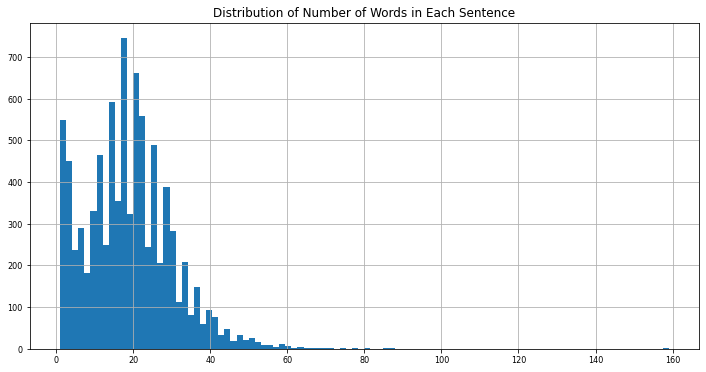

In [114]:
book_df[['Num_Of_Words']].hist(figsize=(12, 6), bins=100, xlabelsize=8, ylabelsize=8);
plt.title("Distribution of Number of Words in Each Sentence")

## WordCloud

Now lets plot a wordcloud of all the words to see their possible distribution in the book. 

For that we will first have to extract every word from every sentence and also replace any line breaks. So we will simply replace all the line breaks using the `replace` function and then we will join each and every word in all the sentences to each other

In [115]:
all_words = ''.join([word for word in book_df['Sentence']]).replace('\n', ' ')
all_words[0:1000]

'First published in Great Britain in 2014 by Hodder & Stoughton An Hachet e UK companyCopyright © Sachin Tendulkar 2014The right of Sachin Tendulkar to be identified as the Author of the Work has been asserted by him in accordance with the Copyright, Designs and Patents Act 1988.All rights reservedNo part of this publication may be reproduced, stored in a retrieval system, or transmit ed, in any form or by any means without the prior writ en permission of the publisher, nor be otherwise circulated in any form of binding or cover other than that in which it is published and without a similar condition being imposed on the subsequent purchaser.A CIP catalogue record for this title is available from the British Library ISBN 9781473605190Hodder & Stoughton Ltd338 Euston RoadLondon NW1 3BHwww.hodder.co.ukTo all my fellow Indians.The author’s proceeds from this book will be used to support two charitable causes: the alleviation of malnutrition in children and the provision of clean water to 

Now that we have joined all the words together, lets generate a wordcloud from them. We will generate a wordcloud using the `wordcloud` library. Lets have a wordcloud of dimensions 500x800. Once the wordcloud is generated, lets visualize it by casting it to an image using the `to_image` function

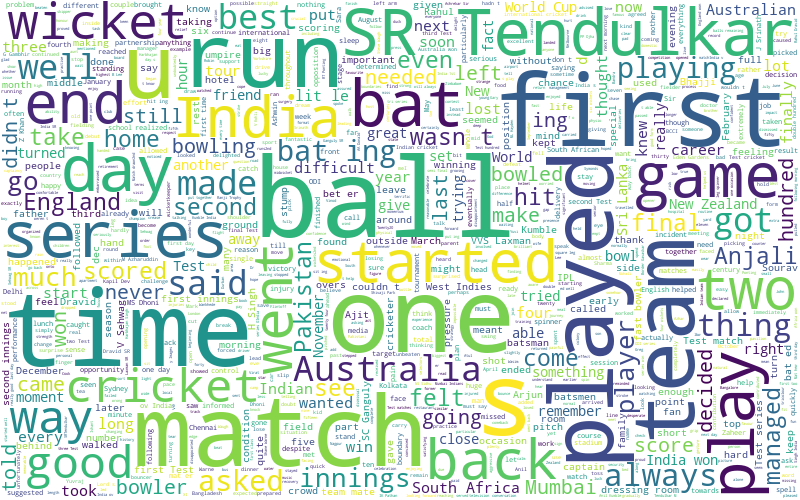

In [116]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", max_words=30000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(all_words)

# Visualize the word cloud
wordcloud.to_image()

That a cool wordcloud! We can see all the important things in his life highlighted. **Cricket, team, wicket, ball, game, match, bat, runs** and obviously **India**!

## Frequency of words

<br>

<center>
<img src="Testing Project/frqeuency.jpeg" width=400 />
</center>
</br>

Now lets first normalize all the sentences and find the top 50 words in our book.

In the process of normalization we will do two things, first we will first convert all the sentences to lower case and then remove all the symbols from the sentences. We will make the words to lower case using the `lower()` function. We will then make use of regex and then we will define two regex checkers, the first will remove all the unnecessary symbols and the second will be to check if our lower words only contain lettes and digits. Lets define a function `normalize_texts` for carrying out this operation

In [117]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_text(texts):
    normalized_texts = ''
    lower_sentence = texts.lower()
    no_punctuation_sentence = NON_ALPHANUM.sub(r' ', lower_sentence)
    no_non_ascii_sentence = NON_ASCII.sub(r'', no_punctuation_sentence)
    return no_non_ascii_sentence

<br>

<center>
<img src="Testing Project/textnormal.jpeg" width=400 />
</center>
</br>

Now lets apply this function to our `Sentence` column in the dataframe and normalize all the words in every sentence. 

Lets store all the results in a new column `Sentence2`

In [118]:
book_df['Sentence_Normalized'] = book_df['Sentence'].apply(normalize_text)
book_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13696\2393849750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['Sentence_Normalized'] = book_df['Sentence'].apply(normalize_text)


Sentence  Num_Of_Words  \
0  First published in Great Britain in 2014 by Ho...            16   
1                  Copyright © Sachin Tendulkar 2014             5   
2  The right of Sachin Tendulkar to be identified...            29   
3                                All rights reserved             3   
4  No part of this publication may be reproduced,...            62   

                                 Sentence_Normalized  
0  first published in great britain in 01 by hodd...  
1                    copyright   sachin tendulkar 01  
2  the right of sachin tendulkar to be identified...  
3                                all rights reserved  
4  no part of this publication may be reproduced ...

Now lets filter all the words in every sentence and only keep those words who length is greater than 2. We will do this by applying a lambda function on our `Sentence_Normalized` column.

In [119]:
book_df['Sentence_Normalized'] = book_df['Sentence_Normalized'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
book_df

C:\Users\User\AppData\Local\Temp\ipykernel_13696\1949483790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df['Sentence_Normalized'] = book_df['Sentence_Normalized'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))


Sentence  Num_Of_Words  \
0     First published in Great Britain in 2014 by Ho...            16   
1                     Copyright © Sachin Tendulkar 2014             5   
2     The right of Sachin Tendulkar to be identified...            29   
3                                   All rights reserved             3   
4     No part of this publication may be reproduced,...            62   
...                                                 ...           ...   
8798                                          Last Word             2   
8799                          Appendix: Farewell Speech             3   
8800                                  Career Statistics             2   
8801                                    Picture Section             2   
8802                      Photographic Acknowledgements             2   

                                    Sentence_Normalized  
0     first published great britain hodder stoughton...  
1                            copyright sachin tendulkar  
2     the right sachin tendulkar identified the auth...  
3                                   all rights reserved  
4     part this publication may reproduced stored re...  
...                                                 ...  
8798                                          last word  
8799                           appendix farewell speech  
8800                                  career statistics  
8801                                    picture section  
8802                      photographic acknowledgements  

[8626 rows x 3 columns]

Now lets define a function `get_top_n_words` where we can find our the top words from our column of normalized and filtered sentences. In this function we will first transform our word corpus to a bag of words using vector transformation and then we will call the frequency of each word in our vector of words. We will then store these words and their frequencies and return the necessary number of words back from the function

In [120]:
def get_top_n_words(corpus, n=10):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Now lets define two lists `words` and `word_values` that will store the words and their respective frequencies. We will apply the function `get_top_n_words` to our column `Sentence_Normalized` and extract the word frequencies. We will then plot a graph of the words and frequencies for our reference.

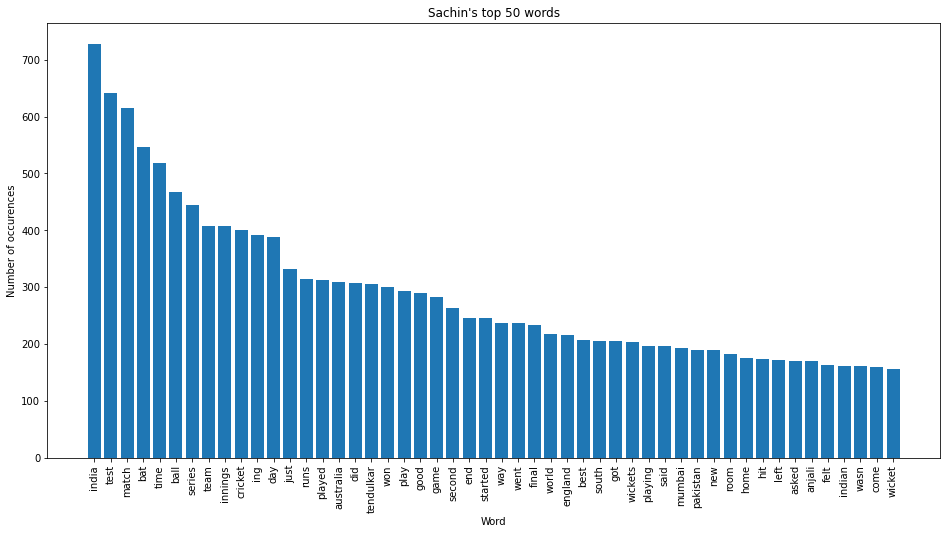

In [121]:
words = []
word_values = []
for i,j in get_top_n_words(book_df['Sentence_Normalized'], 50):
    words.append(i)
    word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title("Sachin's top 50 words");
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

As evident from the graph above, **India** appears at the top of the list! Indeed Sachin loved India a lot and thats why his autobiography has a lot of mentions about the country. Also seen in the list are cricket (what he played), ball, bat (with what he played), innings, team, runs, won, good, game, final (all most used cricket terms) and also his favourite opponents (pakistan, australia, english) and indeed Mumbai! (his hometown)

## Main Characters

<br>

<center>
<img src="Testing Project/characterstop.jpeg" width=400 />
</center>
</br>

Now lets extract a list of all the characters from Sachin's story. This will be fun to do since his life was influenced by a lot of people over the period of time and as he always states he owes a lot to each one of them

For this first lets import `spacy` and then load `en_core_web_sm` which will will use to process our text. `en_core_web_sm` is a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities. Spacy and the pipeline will help us extract insights from our text data. They will label the data and we can then extract characters from our text. So lets first use the above two things and process our text

In [122]:
nlp = spacy.load('en_core_web_sm')

# Process `text` with Spacy NLP Parser
text = '. '.join(book_sentences)

processed_text = nlp(text[:1000000])

Lets now check how many sentences do we have and also print all the sentences we have

In [123]:
sentences = [s for s in processed_text.sents]

print(len(sentences))
print(sentences[:])

8804
[First published in Great Britain in 2014 by Hodder & Stoughton An Hachet e UK company., Copyright, ©, Sachin Tendulkar 2014., The right of Sachin Tendulkar to be identified as the Author of the Work has been asserted by him in accordance with the Copyright, Designs and Patents Act 1988.., All rights reserved., No part of this publication may be reproduced, stored in a retrieval system, or transmit ed, in any form or by any means without the prior writ en permission of the publisher, nor be otherwise circulated in any form of binding or cover other than that in which it is published and without a similar condition being imposed on the subsequent purchaser.., A CIP catalogue record for this title is available from the British Library ISBN 9781473605190., Hodder & Stoughton Ltd. 338 Euston Road., London NW1 3BH. www.hodder.co.uk., To all my fellow Indians.., The author’s proceeds from this book will be used to support two charitable causes: the alleviation of malnutrition in childre

Let us now define a function `find_character_occurences` to find the characters in our text. Since spacy already processed our text, the only thing that we need to do is to find text instances that have been labelled as `PERSON` by spacy. We get the character labels using `label_` and in this way we can check if a character is a person or not. Once we know that a word is a person, we can simply add it to a dictionary and keep a count of their occurences

In [124]:
def find_character_occurences(doc):
    """
    Return a list of actors from `doc` with corresponding occurences.
    
    :param doc: Spacy NLP parsed document
    :return: list of tuples in form
        [('xxx', 622), ('yyy', 312), ('zzz', 286), ...]
    """
    
    characters = Counter()
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            characters[ent.lemma_] += 1
            
    return characters.most_common()

In [125]:
print(find_character_occurences(processed_text))

[('Sourav', 51), ('Zaheer', 39), ('Khan', 37), ('Dhoni', 36), ('Ajit', 33), ('Anil', 28), ('Arjun', 27), ('Kumble', 26), ('Warne', 26), ('Anjali', 22), ('Kolkata', 21), ('Anil Kumble', 20), ('Nagpur', 20), ('Laxman', 20), ('Yuvraj', 20), ('Mark', 18), ('Gary', 18), ('Shane Warne', 17), ('Kapil Dev', 16), ('Steve Waugh', 16), ('Srinath', 16), ('Yuvi', 16), ('Lee', 16), ('McMillan', 15), ('VVS Laxman', 15), ('England', 14), ('Robin', 14), ('Wasim', 13), ('Donald', 13), ('John Wright', 12), ('Yorkshire', 12), ('Atul', 12), ('John', 12), ('Ishant', 12), ('Allan Donald', 11), ('Harbhajan Singh', 11), ('Cairns', 11), ('Zaheer Khan', 11), ('Greg', 11), ('Dale Steyn', 11), ('Ravi Shastri', 10), ('Brian', 10), ('Rahul Dravid', 10), ('Bret Lee', 10), ('Virender Sehwag', 10), ('Flintoff', 10), ('Pathan', 10), ('Nitin', 9), ('Achrekar Sir', 9), ('Srikkanth', 9), ('Navjot Sidhu', 9), ('Glenn McGrath', 9), ('Hamilton', 9), ('Brian Lara', 9), ('Muralitharan', 9), ('McGrath', 9), ('Gautam Gambhir', 9)

Lets also plot the characters' mentions as a time series relative to the position of the actor's occurrence in a book. We will do it in a similar manner as we did above.

In [126]:
def get_character_offsets(doc):
    """
    For every character in a `doc` collect all the occurences offsets and store them into a list. 
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.
    
    :param doc: Spacy NLP parsed document
    :return: dict object in form
        [('xxx', 622), ('yyy', 312), ('zzz', 286), ...]
    """
    
    character_offsets = defaultdict(list)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            character_offsets[ent.lemma_].append(ent.start)
            
    return dict(character_offsets)

In [127]:
character_occurences = get_character_offsets(processed_text)

Now lets check some of the characters we know from his life. Lets check for his friends `Sourav` and `Zaheer` from our list of character occurences.

<left>
<img src="Testing Project/characters.jpeg" width=600 />
</left>

In [128]:
[x for x in list(character_occurences.keys()) if any([x.startswith(y) for y in ['Sourav', 'Zaheer']])]

['Sourav', 'Zaheer Khan', 'Zaheer', 'Zaheer.. South Africa']

Indeed they are here! How can Sachin ever miss them!

<br>

<center>
<img src="Testing Project/friends.jpeg" width=400 />
</center>
</br>

Lets also find the occurences of nouns in our text chunk and find nouns that are most commonly used

In [129]:
doc = processed_text

keywords = Counter()
for chunk in doc.noun_chunks:
    if nlp.vocab[chunk.lemma_].prob < - 8: # probablity value -8 is arbitrarily selected threshold
        keywords[chunk.lemma_] += 1

keywords.most_common(20)

[('I', 5826),
 ('we', 1897),
 ('it', 1790),
 ('he', 1224),
 ('India', 616),
 ('they', 531),
 ('that', 446),
 ('she', 296),
 ('who', 281),
 ('which', 279),
 ('the ball', 278),
 ('Australia', 272),
 ('what', 247),
 ('the match', 235),
 ('the series', 177),
 ('England', 174),
 ('the game', 171),
 ('you', 169),
 ('the end', 166),
 ('the team', 150)]

This being a autobiography, we already expected the noun `I` to be used more frequently than any other!

Now lets define a function to plot the time series plot of the character offsets throughout our book. This will help us to visualise which characters were important to Sachin in which phase of his life!

In [130]:
NUM_BINS = 10

def normalize(occurencies, normalization_constant):
    return [o / float(len(processed_text)) for o in occurencies]

def plot_character_timeseries(character_offsets, character_labels, normalization_constant=None):
    """
    Plot characters' personal names specified in `character_labels` list as time series.
    
    :param character_offsets: dict object in form {'xxx': [123, 543, 4534], 'yyy': [205, 2111]}
    :aparam character_labels: list of strings that should match some of the keys in `character_offsets`
    :param normalization_constant: int
    """ 
    x = [character_offsets[character_label] for character_label in character_labels] 
        
    with plt.style.context('fivethirtyeight'):
        plt.figure()
        n, bins, patches = plt.hist(x, NUM_BINS, label=character_labels)
        plt.clf()
        
        ax = plt.subplot(111)
        for i, a in enumerate(n):
            ax.plot([float(x) / (NUM_BINS - 1) for x in range(len(a))], a, label=character_labels[i])
            
        plt.rcParams['axes.prop_cycle'] = cycler(color=['r','k','c','b','y','m','g','#54a1FF'])
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


First lets plot a time series of his seniors `Kapil Dev` and `Ajit`

<br>

<center>
<img src="Testing Project/kapilajit.jpeg" width=400 />
</center>
</br>

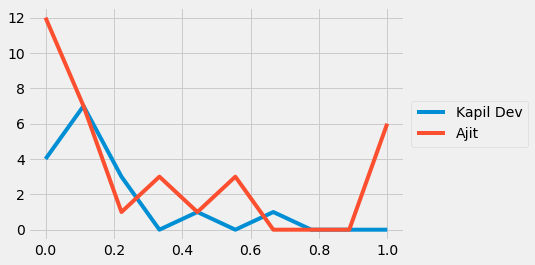

In [131]:
plot_character_timeseries(character_occurences, ['Kapil Dev', 'Ajit'])

As seen from the time series above, Kapil Dev and Ajit were influencial in Sachin's life at the very beginning of his career and that is rightly seen from the time series plot above

Now lets plot a time series of his family members, `Anjali`, `Sara` and `Arjun`

<br>

<center>
<img src="Testing Project/sachinfamily.jpeg" width=400 />
</center>
</br>

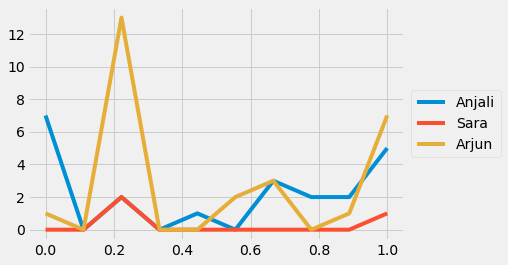

In [132]:
plot_character_timeseries(character_occurences, ['Anjali', 'Sara', 'Arjun'])

This validates everything too. Since all of them came in Sachin's life a bit later after he started his career and then were influencial at all points, we can see their occurences throughout the book. Indeed Sachin is a family guy!

Now lets plot a time series of his true buddies, `Sourav`, `Zaheer` and `Dhoni`

<br>

<center>
<img src="Testing Project/zaheerdhoni.jpeg" width=400 />
</center>
</br>

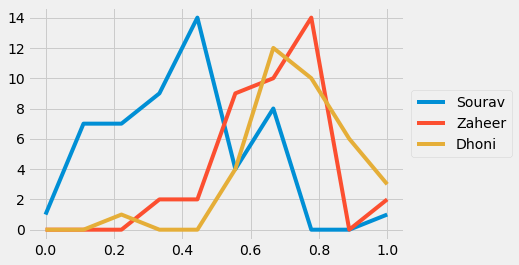

In [133]:
plot_character_timeseries(character_occurences, ['Sourav', 'Zaheer', 'Dhoni'])

This is also as expected. `Sourav` came into Sachin's life at first and was present with him for a long time. `Zaheer` and `Dhoni` came in later but had a pivotal role in his life!

## Bayesian Simulation - GLM

### Generalized Linear Models

<br>

<center>
<img src="Testing Project/glm.jpeg" width=400 />
</center>
</br>

In Data Science, we make use of Generalized Linear Regression Models when we think there is a **linear relationship** between, **one of the statistical moments of** a dependent variable (e.g. the mean), and other independent variable(s).

Usually in Generalized Linear Models, we express the variance of the data as a suitable function of the mean value.

We make use of GLMs because in GLMs it is possible to show that the model is not sensitive to the distribution of the residual errors. In other terms, the GLM model does not care if the errors are normally distributed or otherwise, as long as the mean-variance relationship is satisfied by your data.

Due to this, GLMs are a practical choice for real world data sets which are nonlinear and heteroscedastic and we cannot assume that the model's errors will always be normally distributed.

<br>

<center>
<img src="Testing Project/sachin.jpeg" width=400 />
</center>
</br>

In GLM, lets have the independent variable dependent on two variables `I` and `match`. So lets simply first extract all the sentences from the paragraphs where we encounter either of the two variables above and store them in a dictionary. The dictionary key will be words and the values would be the count of the specific word in each of the paragraphs. 

For the above process we define the function `get_words_paragraphs` which does the necessary job.

So now lets extract the words `I` and `match` from our list of paragraphs

In [134]:
def get_words_paragraphs(paragraphs, words):
    
    word_para = defaultdict(list)
    for p in book_paragraphs:
        for w in words:
            word_para[w].append(p.count(w))
            
    return dict(word_para)

i_match_occurences = get_words_paragraphs(book_paragraphs, ['I', 'match'])
i_occurences = [v for k,v in i_match_occurences.items() if k == 'I'][0]
match_occurences = [v for k,v in i_match_occurences.items() if k == 'match'][0]

The three above lists now contains the occurence count of our words in them. So lets just plot a graph of the occurence count of each of the words above for our reference

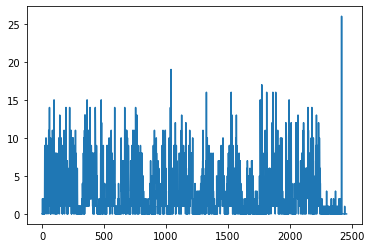

In [135]:
plt.plot(i_occurences)

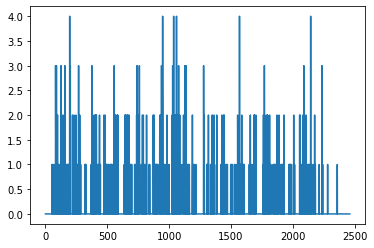

In [136]:
plt.plot(match_occurences)

As seen above, the two words are found in plenty throughout the book. 

Now lets import a txt file `mfd.txt` which is specially curated and contains a number of words that would be related to both `I` (Sachin Tendulkar) and `match`(a cricket match)

We store these words in a list that we would use later

In [138]:
related_words = []
with open('mfd.txt', "r") as input:
    pair_lines = input.read().split("\n")
for p in pair_lines:
    related_words.append(p.split('\t')[0])
print(related_words[0:10])

['innings', 'ball', 'bat', 'wicket', 'match', 'team', 'player', 'batsman', 'bowler', 'fielder']


As we can see above, the list has several words related to both of them such as `bat`, `ball` and so on that should be frequently appearing in our text file.

So now lets define a function `get_any_words_paragraph` where in we will pass the paragraphs and our list of words and it will return us a list which will indicate to us how many occurences of these words combined are seen in each of our paragraphs.

Finally lets call this function and pass our paragraphs and list of words to the function and get the required list. Lets also plot the list to figure out how much is the frequency of appearance of these words in our book.

In [139]:
from tqdm import tqdm
def get_any_words_paragraphs(paragraphs, words):
    
    word_para = []
    for p in tqdm(paragraphs):
        total = 0
        for w in words:
            total += p.count(w)
        word_para.append(total)
            
    return word_para

100%|██████████| 2460/2460 [00:00<00:00, 13820.19it/s]


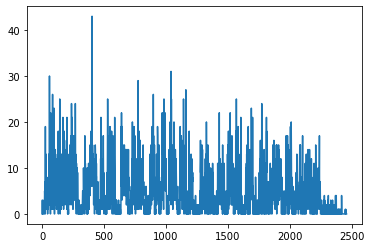

In [140]:
related_occurences = get_any_words_paragraphs(book_paragraphs, related_words)
plt.plot(related_occurences)

As seen above the words are present all over and in plenty.

Lets scale down to plot in order to fit it with the graphs of our two words `I` and `match`

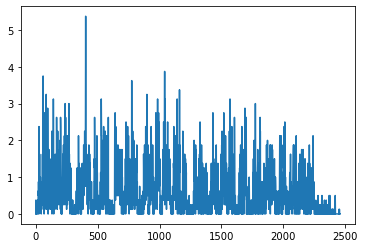

In [141]:
plt.plot([r / 8 for r in  related_occurences])

Plotting all the three graphs together, we get

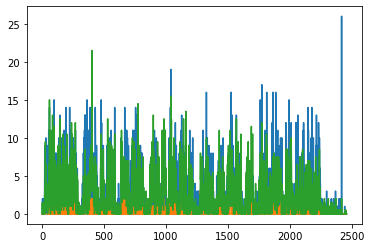

In [142]:
plt.plot(i_occurences)
plt.plot(match_occurences)
plt.plot([r / 2 for r in related_occurences])

Now lets convert our list of occurences for both words into a list of bools. In this list, if the word is present in a particular sentence, the list will simply have `True` signifying its presence, else it will have a `False`

In [143]:
bool_i_occurences = [bool(v) for v in i_occurences]
bool_match_occurences = [bool(v) for v in match_occurences]

Lets make a dataframe from our previous list of word occurences and the list of occurences for our chosen words `I` and `match` using `pandas` and the `zip` function

In [144]:
df_related = pd.DataFrame(list(zip(related_occurences, i_occurences, match_occurences)), 
                        columns =['related', 'I_', 'match'])
df_related[60:90]

related  I_  match
60        9   4      0
61        5   7      0
62        6   5      0
63       10   1      0
64       11   4      0
65        5   4      0
66        2   0      0
67        0   1      0
68       22  10      0
69        6   0      0
70        6   5      1
71        1   0      0
72        6   1      0
73        8   8      0
74        5   8      0
75        2   6      0
76        7   6      0
77        5   5      0
78        2   1      0
79        6   5      0
80       11   9      0
81       12   2      0
82       10   1      3
83       16  11      2
84       26  10      1
85       10   6      2
86        1   1      0
87       12   9      0
88        1   0      0
89       13   5      3

Lets group our dataframe by the columns and find its aggregates `mean` and `variance`

In [145]:
df_related.groupby(['I_', 'match'])['related'].agg(['mean', 'var'])

mean        var
I_ match                      
0  0       1.082658   4.429845
   1       6.804348  18.427536
   2       5.800000  12.700000
1  0       2.568182   9.024953
   1       6.634921  29.751664
...             ...        ...
16 1      18.000000        NaN
   2      10.000000        NaN
17 1      24.000000        NaN
19 2      31.000000        NaN
26 0       4.000000        NaN

[66 rows x 2 columns]

Now lets define a Patsy model string that we would pass to our GLM model.

In Patsy Model String, suppose we have `y ~ x`, then it specifies that we have an output variable y that we want to estimate as a linear function of x.

Since we have more than one input variable we will write the Patsy string as `y ~ a + b + a:b` where `a` and `b` are our two independent variables and `y` is our output variable. The `a:b` in our Patsy string defines the relation between the variables `a` and `b`

Further lets define our GLM model using the pymc3 library. Here we pass the Patsy string as our `formula` and our data frame as the `data`. We then define the `family` as Negative Binomial since it is the best distribution for text prediction. It captures variability in our data and is used when we want to carry out negative trials.

Finally lets draw 4000 samples from our model

In [146]:
fml = 'related ~ I_ + match + I_:match'
import pymc3 as pm
with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=df_related, family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(4000, cores=2)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\User\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, mu, I_:match, match, I_, Intercept]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 102 seconds.
The acceptance probability does not match the target. It is 0.8839606309499987, but should be close to 0.8. Try to increase the number of tuning steps.


Now lets define a trace function that would plot traces of data obtained from our model. These plot traces would be used for visualization and would have means and values present on the plots. Lets also define a function to remove pymc3 generated RVs from a list 

In [147]:
def plot_traces(trcs, varnames=None):
    '''Plot traces with overlaid means and values'''

    nrows = len(trcs.varnames)
    if varnames is not None:
        nrows = len(varnames)

    ax = pm.traceplot(trcs, var_names=varnames, figsize=(12,nrows*1.4),
                      lines={k: v['mean'] for k, v in
                             pm.summary(trcs,var_names=varnames).iterrows()})

    for i, mn in enumerate(pm.summary(trcs, var_names=varnames)['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data',
                         xytext=(5,10), textcoords='offset points', rotation=90,
                         va='bottom', fontsize='large', color='#AA0022')

def strip_derived_rvs(rvs):
    '''Remove PyMC3-generated RVs from a list'''

    ret_rvs = []
    for rv in rvs:
        if not (re.search('_log',rv.name) or re.search('_interval',rv.name)):
            ret_rvs.append(rv)
    return ret_rvs

Lets first call the `strip_derived_rvs` function to get only those RVs that are of use to us

In [148]:
rvs = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
rvs

['Intercept', 'I_', 'match', 'I_:match', 'mu', 'alpha']

Now lets plot traces of the extracted RVs

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\User\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_13696\3456475131.py:8: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  ax = pm.traceplot(trcs, var_names=varnames, figsize=(12,nrows*1.4),
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\User\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accu

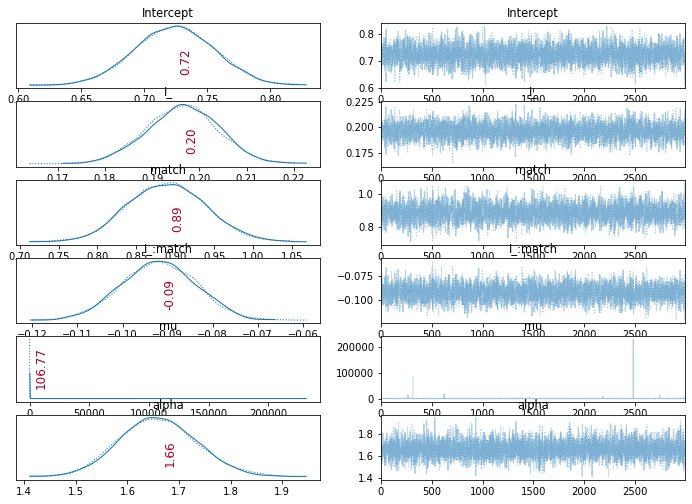

In [149]:
plot_traces(trace[1000:], varnames=rvs);

Lets also transform all obtained RVS and recover parameter values such as mean and variance using the pymc3 summary function

In [150]:
# Transform coefficients to recover parameter values
np.exp(pm.summary(trace[1000:], var_names=rvs))

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\User\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


mean        sd    hdi_3%       hdi_97%     mcse_mean  \
Intercept  2.062667e+00  1.032518  1.948383  2.190216e+00  1.001001e+00   
I_         1.216527e+00  1.008032  1.199614  1.233678e+00  1.000000e+00   
match      2.432696e+00  1.051271  2.227768  2.680491e+00  1.001001e+00   
I_:match   9.121051e-01  1.008032  0.899425  9.268162e-01  1.000000e+00   
mu         2.339847e+46       inf  1.008032  8.736421e+47  2.383258e+18   
alpha      5.259311e+00  1.077884  4.585962  6.073895e+00  1.001001e+00   

                mcse_sd  ess_bulk  ess_tail     r_hat  
Intercept  1.000000e+00       inf       inf  2.718282  
I_         1.000000e+00       inf       inf  2.718282  
match      1.001001e+00       inf       inf  2.718282  
I_:match   1.000000e+00       inf       inf  2.718282  
mu         9.894498e+12       inf       inf  2.718282  
alpha      1.001001e+00       inf       inf  2.718282

Now lets create another dataframe whether we zip all the boolean occurences of our list of words and our variable words `I` and `match`

In [151]:
df_related2 = pd.DataFrame(list(zip(related_occurences, bool_i_occurences, bool_match_occurences)), 
                        columns =['related', 'i_p', 'match_p'])
df_related2

related    i_p  match_p
0           0  False    False
1           3  False    False
2           3  False    False
3           0   True    False
4           0  False    False
...       ...    ...      ...
2455        0  False    False
2456        0  False    False
2457        0  False    False
2458        0  False    False
2459        0  False    False

[2460 rows x 3 columns]

Lets also plot the combinations of booleans for our reference.

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


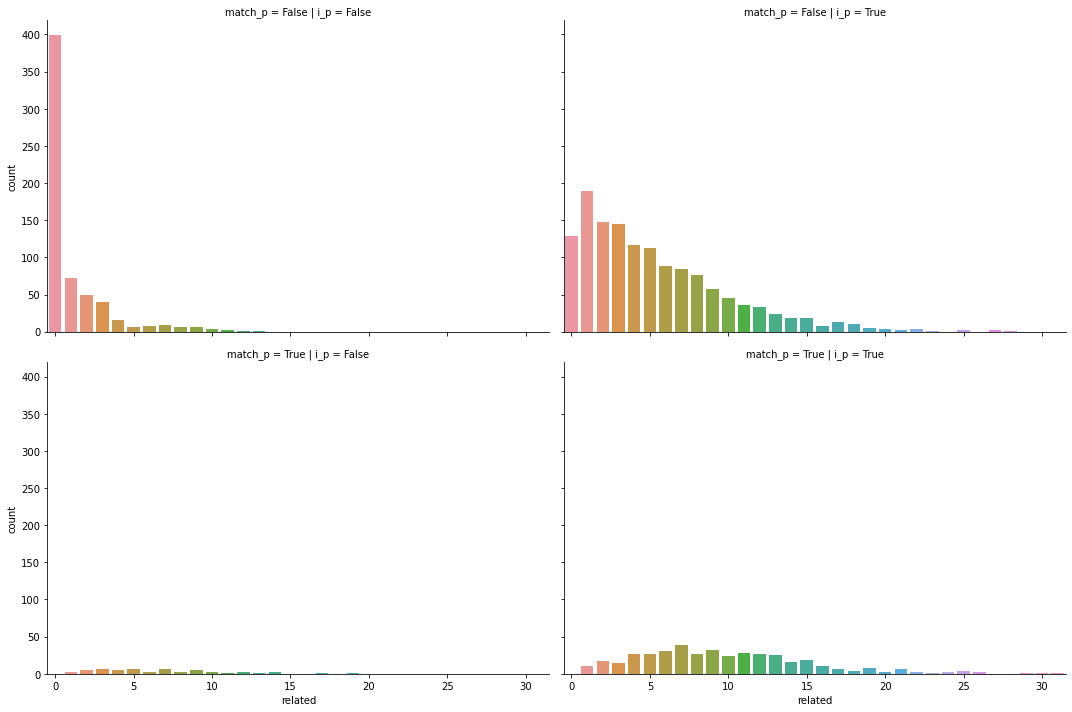

In [152]:
import seaborn as sns
g = sns.factorplot(x='related', row='match_p', col='i_p', data=df_related2, kind='count', aspect=1.5)

# Make x-axis ticklabels less crowded
ax = g.axes[1, 0]
labels = range(len(ax.get_xticklabels(which='both')))
ax.set_xticks(labels[::5])
ax.set_xticklabels(labels[::5]);

As seen above, the number of false positives for both the variables is somewhat high. But we have have true positives for both the variable words as well. Similarly there are a lot of combinations of false positive of `match` and true positives of `I`

Now lets use the `groupby` function on our new dataframe to find out the mean and variance of our boolean occurences

In [153]:
df_related2.groupby(['i_p', 'match_p'])['related'].agg(['mean', 'var'])

mean        var
i_p   match_p                     
False False    1.082658   4.429845
      True     6.705882  17.691765
True  False    5.301599  21.745336
      True     9.824519  32.530578

Now lets make a Bayesian model that will accept the boolean occurence list in the Patsy string model and further lets define our GLM model using the pymc3 library. Here we pass the Patsy string as our `formula` and our data frame as the `data`. We then define the `family` as Negative Binomial since it is the best distribution for text prediction.

In [154]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
%matplotlib inline

fml = 'related ~ i_p + match_p + i_p:match_p' 

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=df_related2, family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(2000, cores=2)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\User\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, mu, i_p[T.True]:match_p[T.True], match_p[T.True], i_p[T.True], Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 93 seconds.


Lets first call the `strip_derived_rvs` function to get only those RVs that are of use to us.

Then lets plot traces of the stripped RVs for our reference

Got error No model on context stack. trying to find log_likelihood in translation.


['Intercept', 'i_p[T.True]', 'match_p[T.True]', 'i_p[T.True]:match_p[T.True]', 'mu', 'alpha']


C:\Users\User\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_13696\3456475131.py:8: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  ax = pm.traceplot(trcs, var_names=varnames, figsize=(12,nrows*1.4),
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\User\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pym

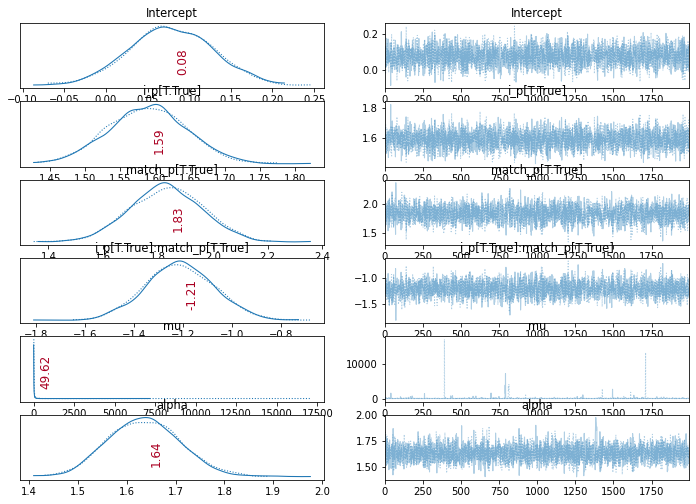

In [155]:
rvs = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
print(rvs)
plot_traces(trace, varnames=rvs);

Finally lets generate a summary of the stripped RVs

In [156]:
np.exp(pm.summary(trace, var_names=rvs)[['mean','hdi_3%','hdi_97%']])

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\User\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean    hdi_3%       hdi_97%
Intercept                    1.081123e+00  0.985112  1.185305e+00
i_p[T.True]                  4.903749e+00  4.432661  5.457550e+00
match_p[T.True]              6.233887e+00  4.854956  7.932752e+00
i_p[T.True]:match_p[T.True]  2.976015e-01  0.224922  3.809832e-01
mu                           3.527936e+21  1.002002  8.819906e+41
alpha                        5.134590e+00  4.441535  5.847417e+00

Let us also find out the summary of our dataframe by using the `groupby` function

In [157]:
df_related2.groupby(['i_p','match_p'])['related'].agg(['mean', 'var'])

mean        var
i_p   match_p                     
False False    1.082658   4.429845
      True     6.705882  17.691765
True  False    5.301599  21.745336
      True     9.824519  32.530578

As seen above the Intercept value is 1.08 which is exactly as we obtained from our dataframe summary. Similarly the values for true positives of `i_p` and `match_p` are 4.9 and 6.23 which are closer to the values 5.3 and 6.7 which we obtained from our dataframe summary. 

Hence our Bayesian was able to train correctly on our dataframe and we were able to obtain accurate results from our GLM model

# Text Analytics using Texthero

<br>

<center>
<img src="Testing Project/superherominion.jpeg" width=400 />
</center>
</br>

Texthero is a python package to let you work efficiently and quickly with text data. You can think of texhero as `scikit-learn` for text-based dataset.

It is a simple way to clean and analyse text using pandas. It simplifies NLP pipelines and it’s functionality includes pre-processing to work with text data efficiently.

Moreover Texthero, when initialized, imports all necessary libraries including `NLTK` and `Spacy` 

Once the library is imported and text data given through pandas, the Texthero package pre-processes it to make it ready for visual representation by reducing and keeping important dimensions. In addition to this, it can

- Show Top words by using scikit learn for TF IDF and Count and embedding

- Stemming StopWords can be added or removed

- Creating a pipeline using PCA and run Kmeans clustering for later visualizations

- Scatter plot and Word Cloud  using Plotly

In [160]:
import texthero as hero
import pandas as pd
import os

In [162]:
for root, dirs, files in os.walk("Testing Project/"):
    for file in files:
        if file.endswith(".txt"):
             print(os.path.join(root, file))

Testing Project/Playing It My Way by Sachin Tendulkar (1).txt


In [163]:
book_paragraphs = []
for root, dirs, files in os.walk("Testing Project/"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r",encoding='utf-8') as input:
                paragraphs = input.read().split("\n\n")   #\n\n denotes there is a blank line in between paragraphs.
            #print(paragraphs[0])
            book_paragraphs.extend(paragraphs)
            
print(len(book_paragraphs))
print(book_paragraphs[0])

Testing Project/Playing It My Way by Sachin Tendulkar (1).txt
3245
First published in Great Britain in 2014 by Hodder & Stoughton An Hachet e UK company


In [164]:
book_sentences = []
for root, dirs, files in os.walk("Testing Project/"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r",encoding='utf-8') as input:
                sentences = input.read().split(". ")   #. denotes end of sentence
            book_sentences.extend(sentences)
            
print(len(book_sentences))
print(book_sentences[0])

Testing Project/Playing It My Way by Sachin Tendulkar (1).txt
5826
First published in Great Britain in 2014 by Hodder & Stoughton An Hachet e UK company

Copyright © Sachin Tendulkar 2014

The right of Sachin Tendulkar to be identified as the Author of the Work has been asserted by him in accordance with the Copyright, Designs and Patents Act 1988.

All rights reserved


In [165]:
book_df = pd.DataFrame(book_sentences, columns = ['Sentence'])
book_df.head()

Sentence
0  First published in Great Britain in 2014 by Ho...
1  No part of this publication may be reproduced,...
2                                     Childhood\n\n2
3                             Learning the Game\n\n3
4                                 My First Tour\n\n4

To clean the text data all we have to do is use the .clean()  API of text hero

The default pipeline for the clean method is the following:

- fillna(s) Replace not assigned values with empty spaces.
- lowercase(s) Lowercase all text.
- remove_digits() Remove all blocks of digits.
- remove_punctuation() Remove all string.punctuation.
- remove_diacritics() Remove all accents from strings.
- remove_stopwords() Remove all stop words.
- remove_whitespace() Remove all white space between words.

In [166]:
book_df['clean_text'] = hero.clean(book_df['Sentence'])

In [167]:
book_df

Sentence  \
0     First published in Great Britain in 2014 by Ho...   
1     No part of this publication may be reproduced,...   
2                                        Childhood\n\n2   
3                                Learning the Game\n\n3   
4                                    My First Tour\n\n4   
...                                                 ...   
5821              The Quest for the 100th Hundred\n\n25   
5822                          My Last Full Season\n\n26   
5823                                 Winding Down\n\n27   
5824                               The Final Test\n\n28   
5825  Last Word\n\nAppendix: Farewell Speech\n\nCare...   

                                             clean_text  
0     first published great britain hodder stoughton...  
1     part publication may reproduced stored retriev...  
2                                             childhood  
3                                         learning game  
4                                            first tour  
...                                                 ...  
5821                                quest 100th hundred  
5822                                   last full season  
5823                                            winding  
5824                                         final test  
5825  last word appendix farewell speech career stat...  

[5826 rows x 2 columns]

## Inspecting top words is only 1 line of code and using plotly to plot the bar chart

In [168]:
tw = hero.visualization.top_words(book_df['clean_text']).head(10)

In [169]:
import plotly.express as px
fig = px.bar(tw)
fig.show()
tw.head()

-        1683
'         901
india     717
first     672
test      642
Name: clean_text, dtype: int64

<AxesSubplot:>

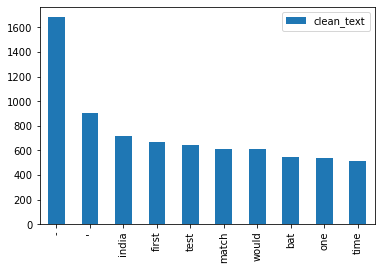

In [174]:
import pandas as pd

plotdata = pd.DataFrame(tw)
plotdata.plot(kind="bar")

## Removing stopwords

In [175]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
#add a list of stopwords to the stopwords
custom_stopwords = default_stopwords.union(set(["'","-"]))
#Call remove_stopwords and pass the custom_stopwords list
book_df['clean_text'] = hero.remove_stopwords(book_df['clean_text'], custom_stopwords)

## Re-visualize after removal of stopwords

In [176]:
twNew = hero.visualization.top_words(book_df['clean_text']).head(10)
fig = px.bar(twNew)
fig.show()
tw.head()

-        1683
'         901
india     717
first     672
test      642
Name: clean_text, dtype: int64

<AxesSubplot:>

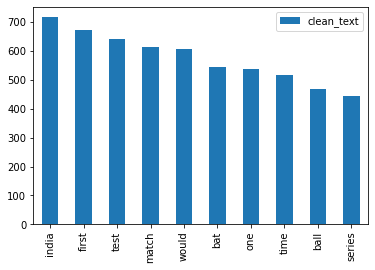

In [177]:
import pandas as pd

plotdata = pd.DataFrame(twNew)
plotdata.plot(kind="bar")

And we are finally done!

<br>

<center>
<img src="Testing Project/done.gif" width=500 />
</center>
</br>